In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

In [3]:
# Set sns-style and figsize
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

In [4]:
# Reading 
data = pd.read_csv("../sthlm/sthlm_v1.csv")

# Intro

I'm visualizing basic overview info about apartments sold in Stockholm (2013-2020)

# Graphs - overview of data

## No. of sales / year

In [13]:
# create new df: groupby by year, count no. of objects sold
data_sålda_år = data.groupby("år")[["adress"]].count().reset_index()

In [14]:
# View df
data_sålda_år

,år,adress
0,2013,4059
1,2014,7116
2,2015,7728
3,2016,7717
4,2017,7809
5,2018,7867
6,2019,8830
7,2020,6810


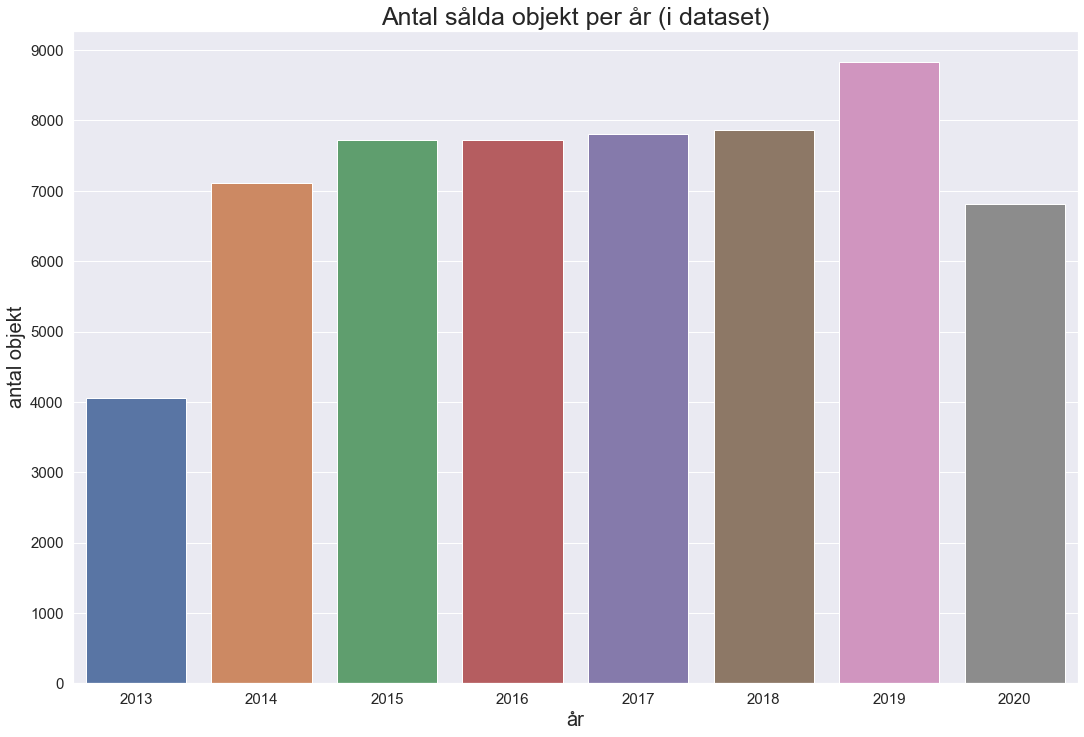

In [15]:
# make barplot from df
sns.barplot(data=data_sålda_år, x="år", y="adress")

plt.xlabel("år",fontsize = 20)
plt.ylabel("antal objekt", fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks([i for i in range(0,10000,1000)],fontsize=15)
plt.title("Antal sålda objekt per år (i dataset)", fontsize=25)
plt.show()

## Avg. price / square meters for each year

In [16]:
# new df: groupby year, average price/square metres
data_kr_kvm = data.groupby("år")[["kr_kvm"]].mean().reset_index()

In [17]:
# view df
data_kr_kvm

,år,kr_kvm
0,2013,62740.628973
1,2014,70479.417650
2,2015,82966.397904
3,2016,88204.646495
4,2017,91145.249328
5,2018,85985.604932
6,2019,88566.538845
7,2020,92727.549486


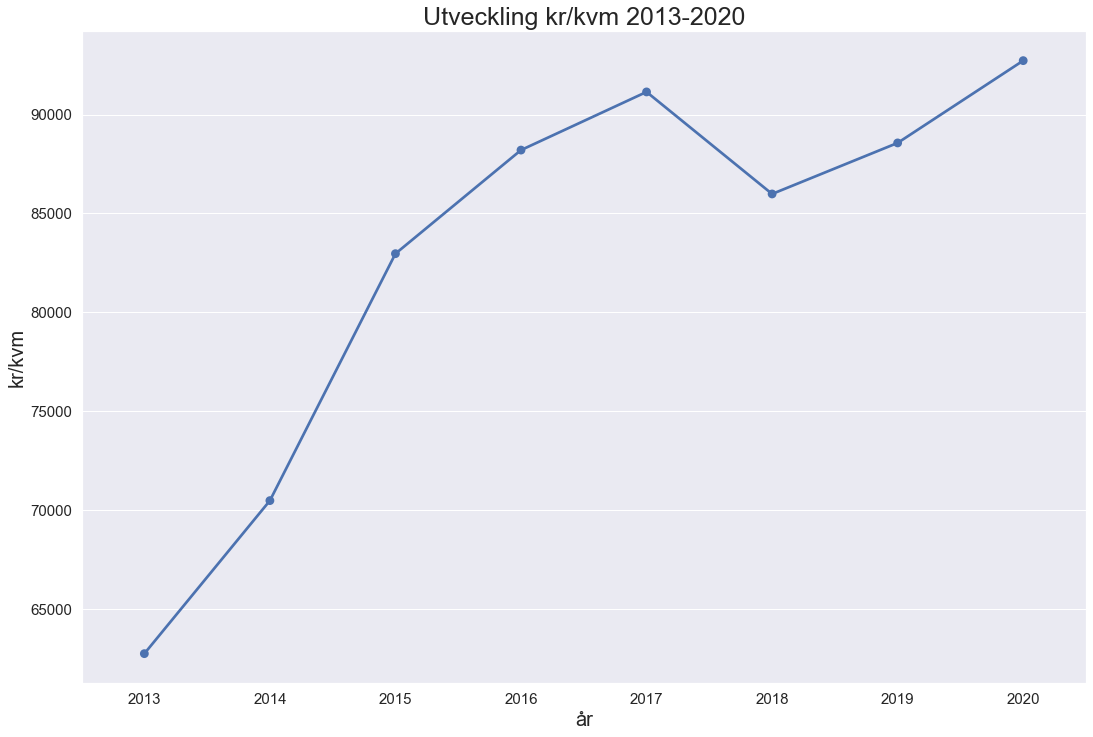

In [27]:
# pointplot from df
sns.pointplot(data=data_kr_kvm, x="år", y="kr_kvm")

plt.xlabel("år",fontsize = 20)
plt.ylabel("kr/kvm", fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Utveckling kr/kvm 2013-2020", fontsize=25)
plt.show()

## Avg. price/square metres for every month

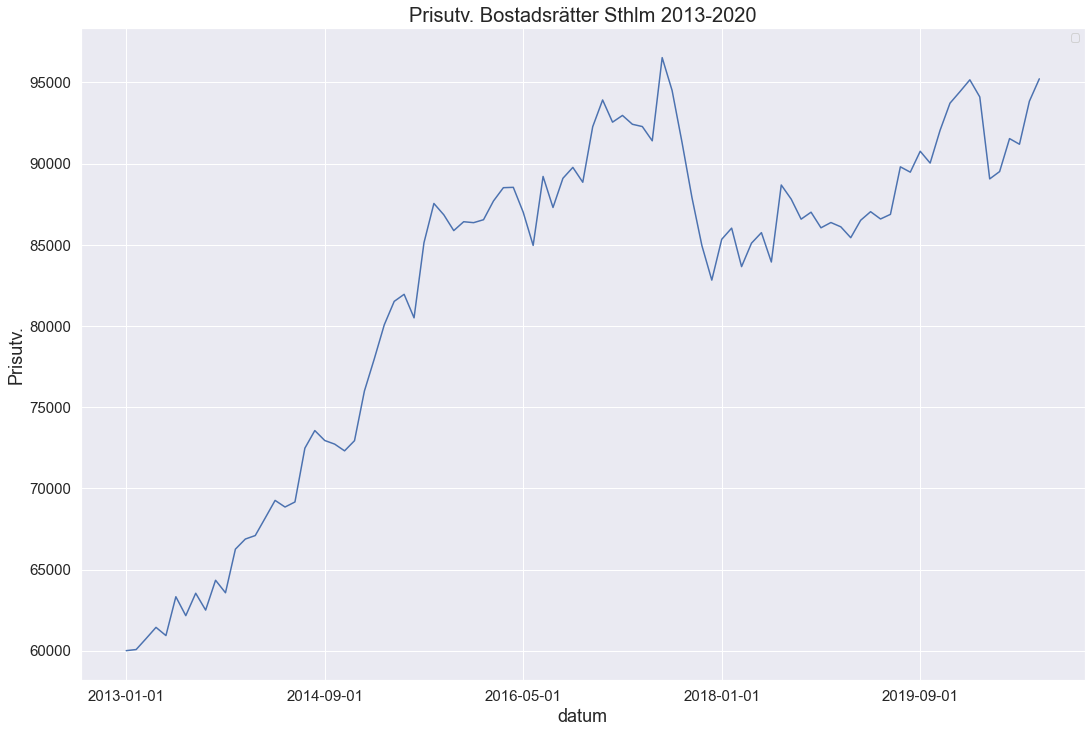

In [26]:
# make plot from original dataframe 
# groupby: year_month
# calculate: average price/square metres
data.groupby("år_månad")[["kr_kvm"]].mean().plot()

plt.title("Prisutv. Bostadsrätter Sthlm 2013-2020", fontsize = 20)
plt.xticks(fontsize = 15, fontweight="normal")
plt.yticks(fontsize = 15, fontweight="normal")
plt.ylabel("Prisutv.", fontsize = 18)
plt.xlabel("datum", fontsize = 18)
plt.legend("")

plt.show()

## No. of sold objects grouped by no. of rooms

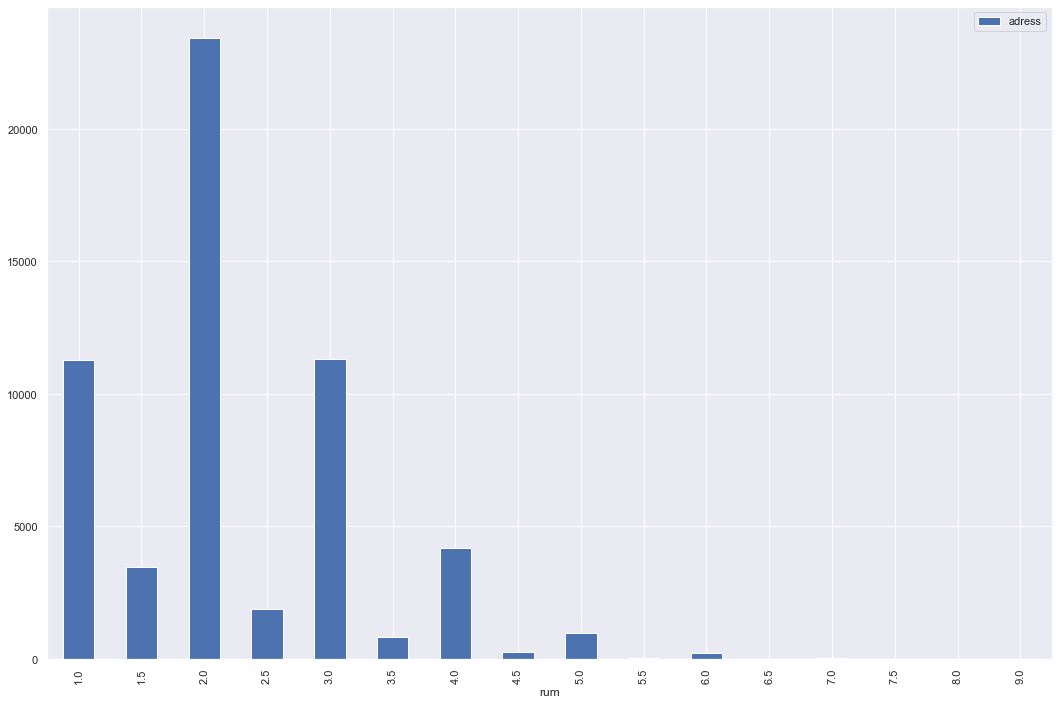

In [50]:
# barplot directly from original dataframe
# groupby: room (number of rooms in apartment)
# calculate: count no. of objects sold
data.groupby("rum")[["adress"]].count().plot.bar()
plt.show()

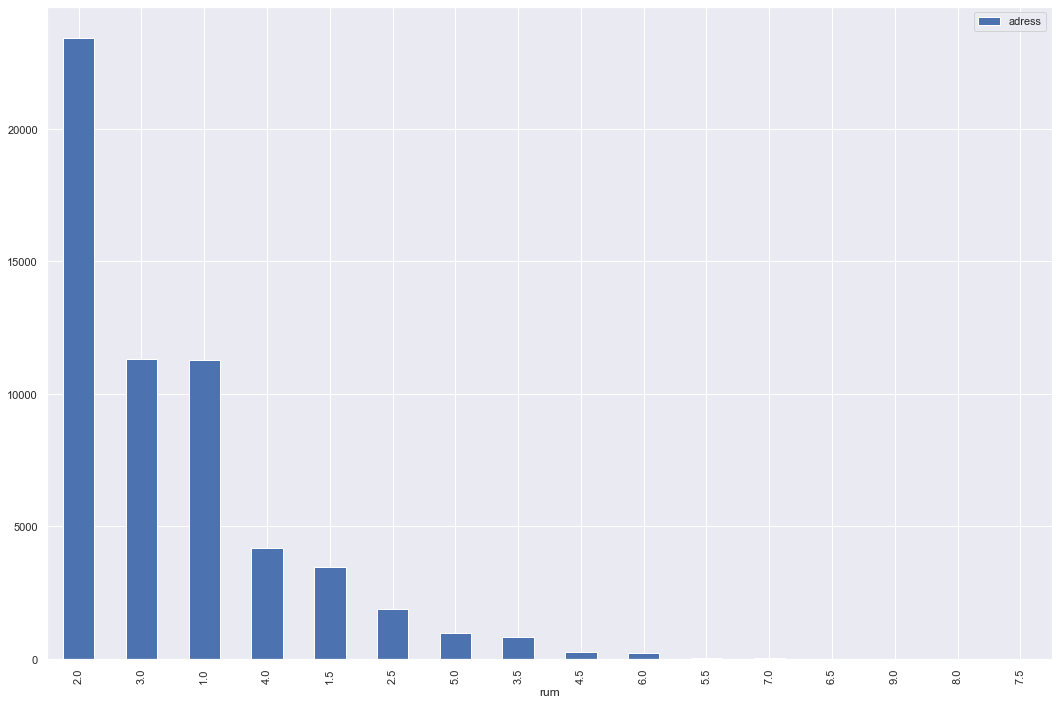

In [31]:
# same plot as above but different sort
# sort: descending no. of objects for each room category
data.groupby("rum")[["adress"]].count().sort_values(by="adress", ascending = False).plot.bar()
plt.show()

## Count sold objects groupby by month

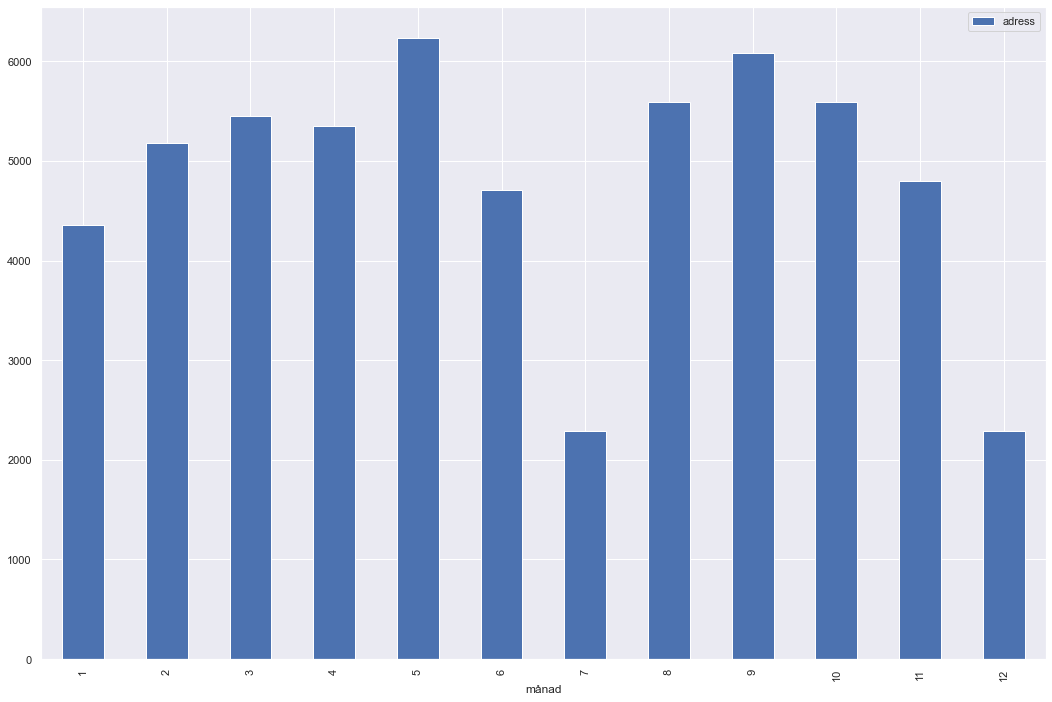

In [73]:
# plot directly from original dataframe
# groupby: month (i.e. jan 2013-2020 is group "1" and dec 2013-2020 is group "12")
# calculate: count no. objects sold
data.groupby("månad")[["adress"]].count().plot.bar()
plt.show()

## Avg. price/square metres for months

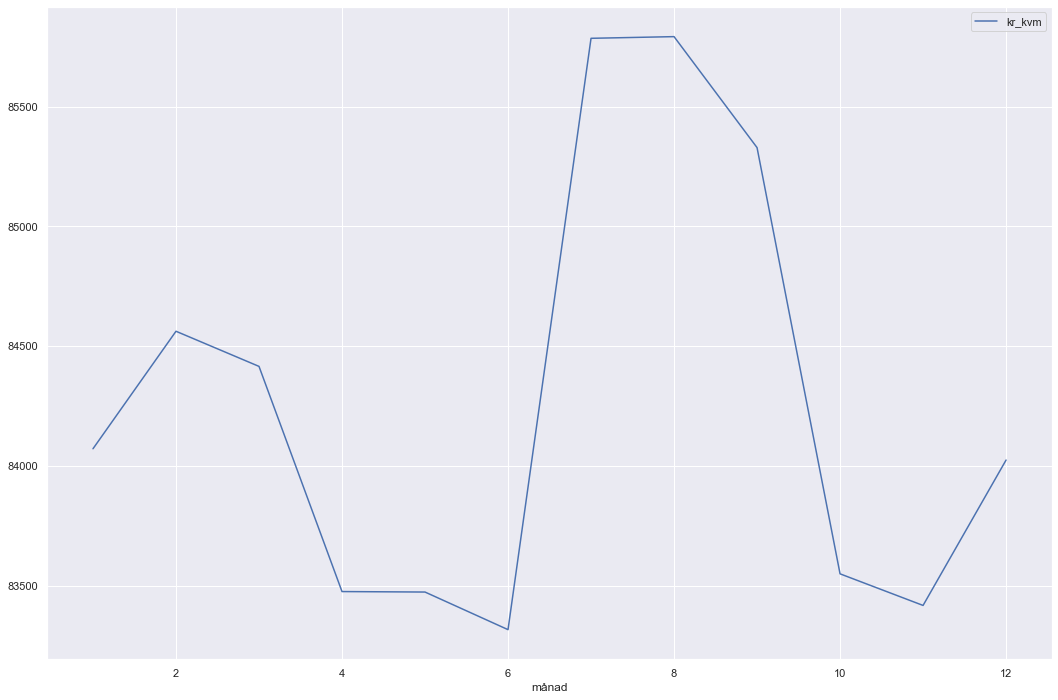

In [57]:
# plot from original dataframe
# groupby: month (i.e. jan 2013-2020 is group "1" and dec 2013-2020 is group "12")
# calculate: count avg. price/square metres
data.groupby("månad")[["kr_kvm"]].mean().plot()
plt.show()

## Brokers - Pareto distribution?

Check if the 20% most productive brokers sold 80% of the apartments

In [67]:
# create new df from value_counts of brokers
maklare_sum = data.maklare.value_counts().to_frame().reset_index()
# sort asc. by by broker (count of objects sold) 
maklare_sum.sort_values(by="maklare", inplace = True)
# create new column with cumsum for apartments sold
maklare_sum["cumsum"] = maklare_sum.maklare.cumsum()

In [68]:
# drop useless columns
maklare_sum.drop(columns = ["index", "maklare"], inplace = True)

In [69]:
# reset index and drop earlier index
maklare_sum.reset_index(drop=True, inplace = True)

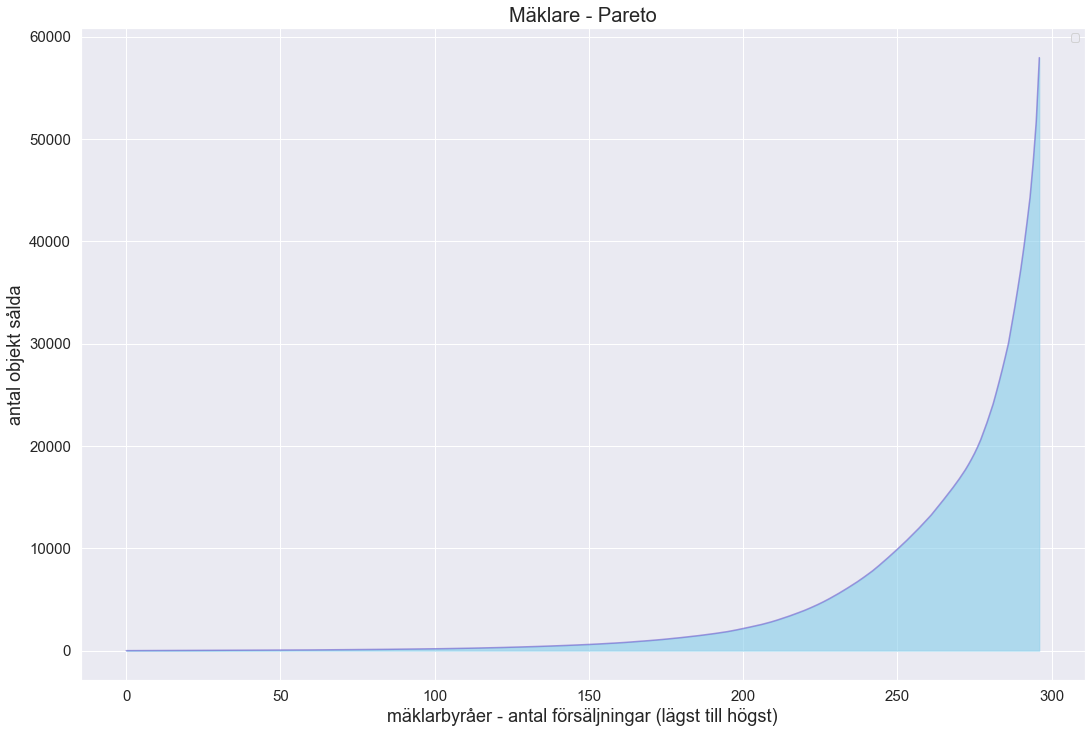

In [70]:
# Create graph to illustrate distribution of apartments sold
# i.e. the 250 broker firms that sold the least no. of apartments had a total sum of around 10 000 apartments sold...
# ... whils the top 50 broker forms had a total sum of about 48 000 apartments sold
x = list(maklare_sum.index)
y = list(maklare_sum["cumsum"])
plt.fill_between(x, y, color="skyblue", alpha=0.6)

plt.plot(x, y, color="Slateblue", alpha=0.6)

plt.legend("")

plt.title("Mäklare - Pareto", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("antal objekt sålda", fontsize = 18)
plt.xlabel("mäklarbyråer - antal försäljningar (lägst till högst)", fontsize = 18)

plt.show()

## Gator - Pareto?

Check if the adresses with the top 20% highest turnover of apartments makes up 80% of total apartments sold

In [71]:
# create new df from value_counts of street name
gata_cumsum = data.gata_lst.value_counts().to_frame()

# sort values asc. by freq count of street name
gata_cumsum.sort_values(by="gata_lst", inplace = True)

# create new column with cumsum of apartments sold for every street in data-set
gata_cumsum["cumsum"] = gata_cumsum.gata_lst.cumsum()

# reset index
gata_cumsum.reset_index(inplace = True)

In [72]:
# inspect new df
gata_cumsum

,index,gata_lst,cumsum
0,Scheffersgatan,1,1
1,Fjällgatan,1,2
2,Bedoirsgränd,1,3
3,Blommensbergsvägen,1,4
4,Kristinebergs Slottsväg,1,5
...,...,...,...
630,Tomtebogatan,557,54040
631,Roslagsgatan,588,54628
632,Birger Jarlsgatan,589,55217
633,Sankt Eriksgatan,726,55943


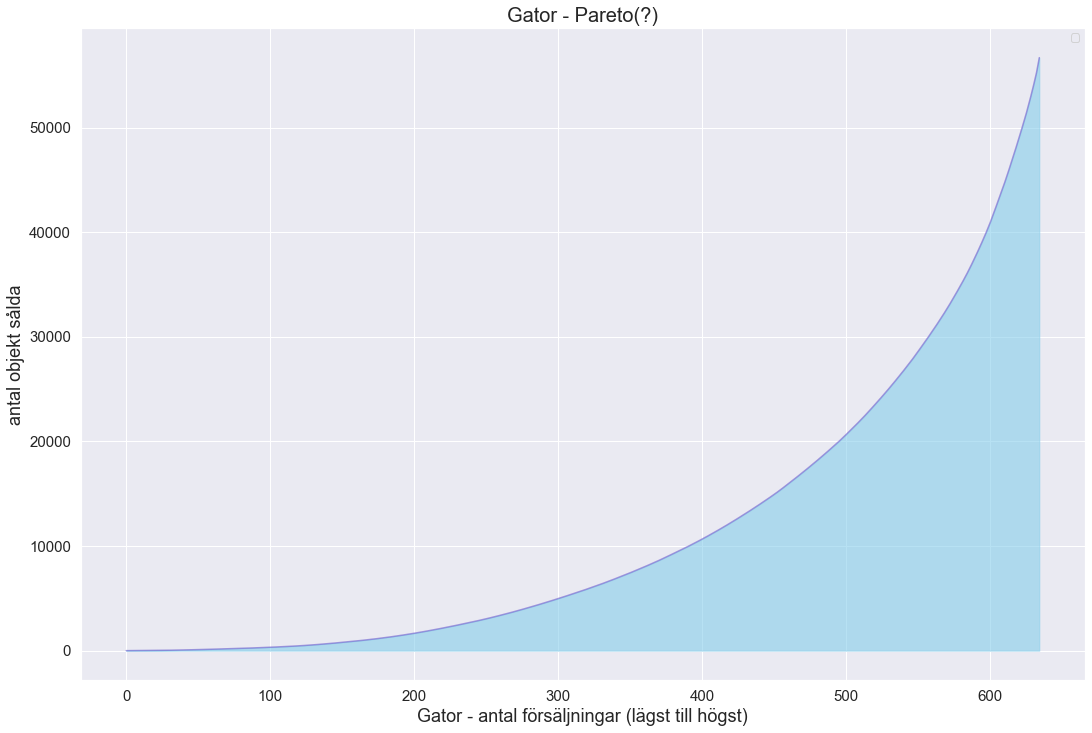

In [49]:
# same logic as the chart above "Brokers - Pareto distribution?"

# i.e. 500 streets total sum of apartments sold ~ 20 000...
# ... whilst the 150 streets with the highest turnover had total sales of ~ 38 000

x = list(gata_cumsum.index)
y = list(gata_cumsum["cumsum"])
plt.fill_between(x, y, color="skyblue", alpha=0.6)

plt.plot(x, y, color="Slateblue", alpha=0.6)

plt.legend("")

plt.title("Gator - Pareto(?)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("antal objekt sålda", fontsize = 18)
plt.xlabel("Gator - antal försäljningar (lägst till högst)", fontsize = 18)

plt.show()